### I have taken up dataset from kaggle 

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats
import os

data = pd.read_csv('vgsales.csv')

In [5]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
data.shape

(16598, 11)

#checking the missing data group by year

In [7]:
data.isnull().groupby(["Year"]).sum()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
False,0,0,0,0,36,0,0,0,0,0
True,0,0,0,0,22,0,0,0,0,0


In [8]:
##False → rows where Year is NOT missing
##True → rows where Year is missing
##In the rows where 'Year' is missing (True), 22 publishers are also missing — suggesting that these entries are likely incomplete data.



In [52]:
data.groupby('Year').apply(lambda x: x.isnull().sum())
#here we can see maximum values are missing after 2015

/var/folders/1y/f31m7bqx751447yyyvn57kzr0000gn/T/ipykernel_3081/1237213299.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby('Year').apply(lambda x: x.isnull().sum())


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,,
1980.0,0,0,0,0,0,0,0,0,0,0,0
1981.0,0,0,0,0,0,0,0,0,0,0,0
1982.0,0,0,0,0,0,0,0,0,0,0,0
1983.0,0,0,0,0,0,0,0,0,0,0,0
1984.0,0,0,0,0,0,0,0,0,0,0,0
1985.0,0,0,0,0,0,0,0,0,0,0,0
1986.0,0,0,0,0,0,0,0,0,0,0,0
1987.0,0,0,0,0,0,0,0,0,0,0,0
1988.0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
drop_row_index = data[data['Year'] > 2015].index.sum().head(10)
data = data.drop(drop_row_index)

AttributeError: 'Index' object has no attribute 'sum'

In [11]:
data.shape

(16250, 11)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [13]:
data.describe

<bound method NDFrame.describe of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_S

In [14]:
data.describe(include=['object', 'bool'])

,Name,Platform,Genre,Publisher
count,16250,16250,16250,16194
unique,11296,31,12,566
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2162,3196,1331


In [15]:
data.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## 1. What genre games have been made the most?

In [16]:
data['Genre'].value_counts()


Genre
Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: count, dtype: int64

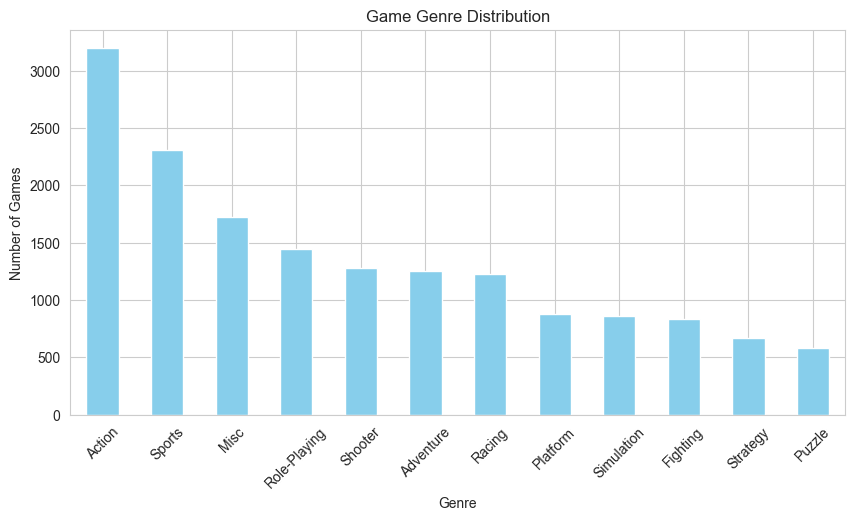

In [17]:
data['Genre'].value_counts().plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Game Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

### Action and sports are the most loved by peoples

# 2.Which year had the most game release?

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '1999.0'),
  Text(18, 0, '1997.0'),
  Text(19, 0, '1996.0'),
  Text(20, 0, '1995.0'),
  Text(21, 0, '1994.0'),
  Text(22, 0, '1993.0'),
  Text(23, 0, '1981.0'),
  Text(24, 0, '1992.0'),
  Text(25, 0, '1991.0'),
  Text(26, 0, '1982.0'),
  Text(27, 0, '1986.0'),
  Text(28, 0, '1989.0'),
  Text(29, 0, '1983.0'),
  Text(30, 0, '1990.0'),
  Text(31, 0, '1987.0'),
  T

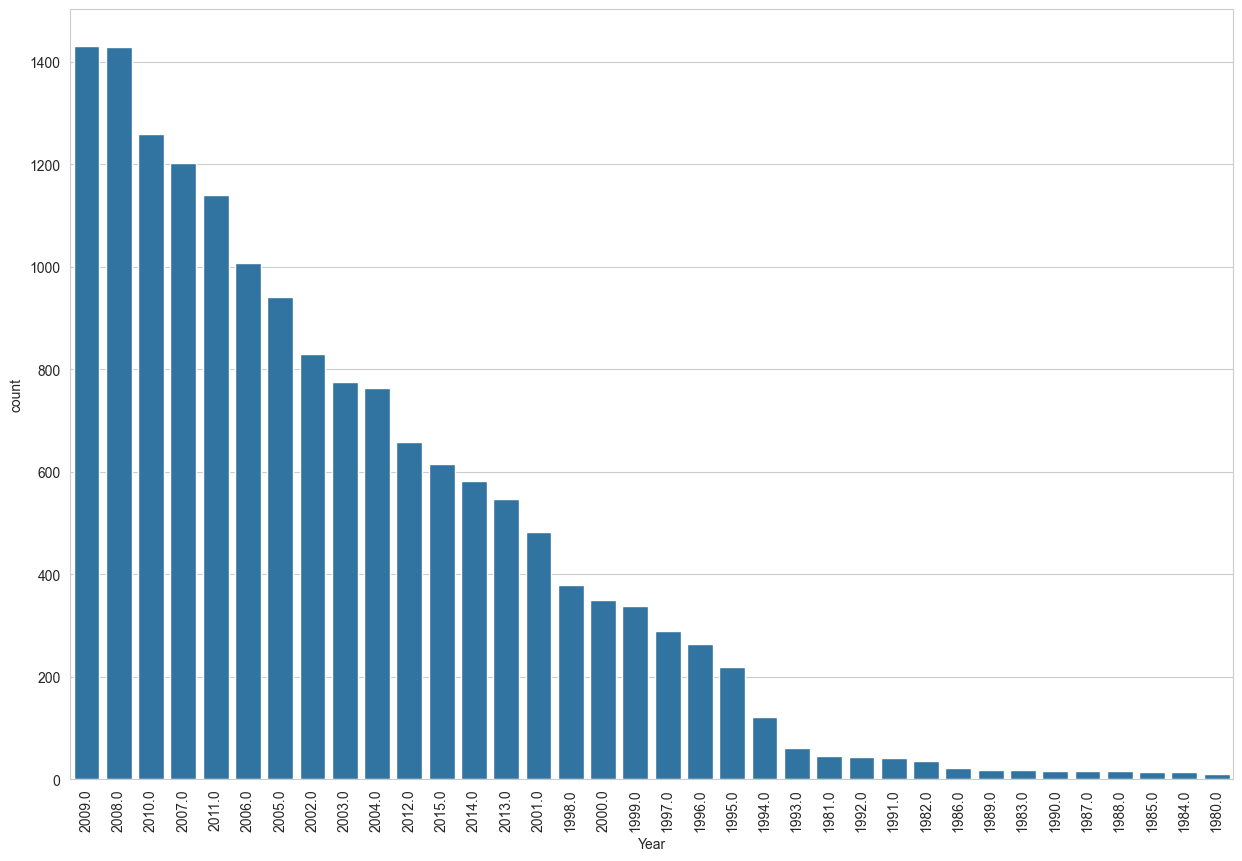

In [18]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

# 3.Top 5 years games release by genre

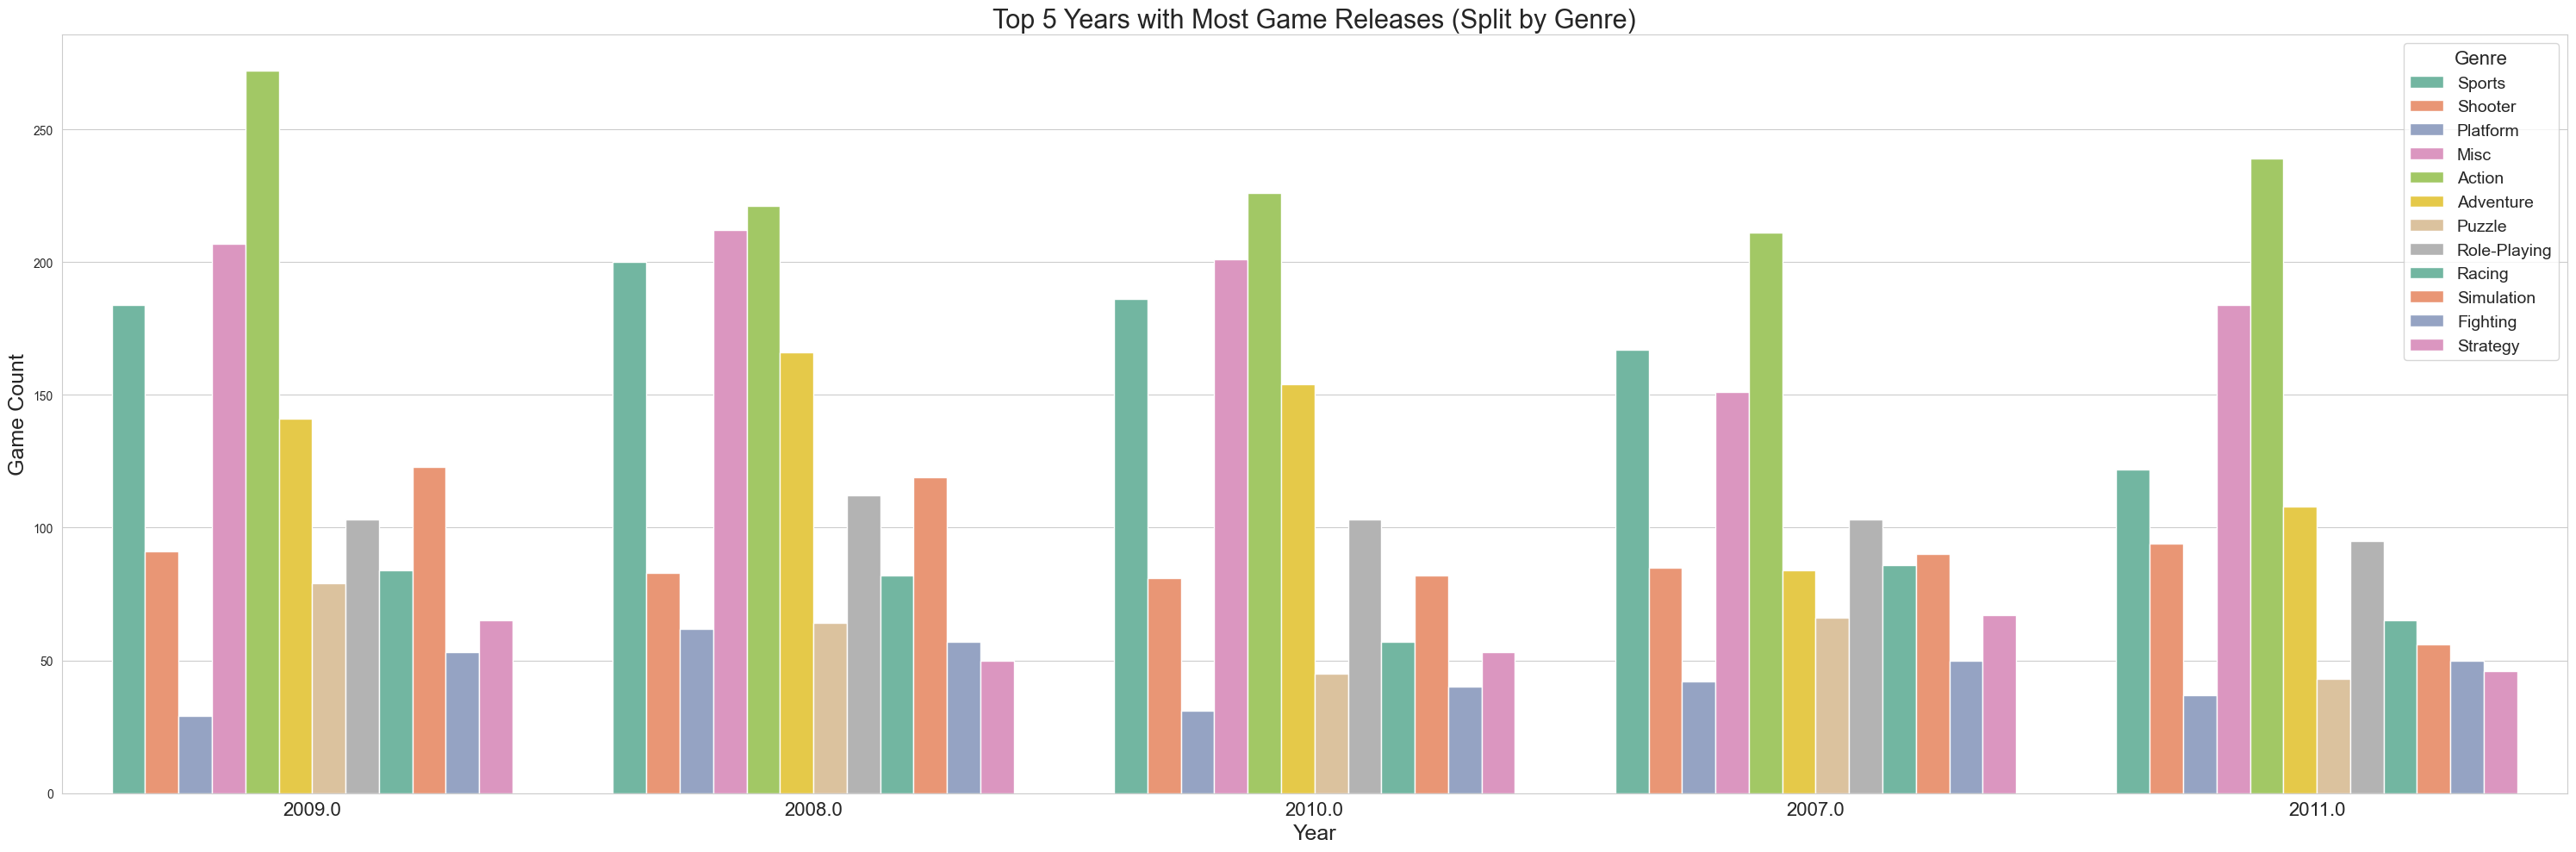

In [19]:
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Get top 5 years by count
top_5_years = data['Year'].value_counts().nlargest(5).index

# Filter data for those years only
filtered_data = data[data['Year'].isin(top_5_years)]

# Plot
plt.figure(figsize=(30, 10))
sns.countplot(
    x="Year", 
    hue='Genre', 
    data=filtered_data,
    order=top_5_years,
    palette="Set2"
)

plt.title("Top 5 Years with Most Game Releases (Split by Genre)", fontsize=22)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Game Count", fontsize=18)
plt.xticks(size=16, rotation=0)
plt.legend(title='Genre', fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.show()

### Action was always on top

## 4.Which year had the highest sales worldwide?

In [20]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  T

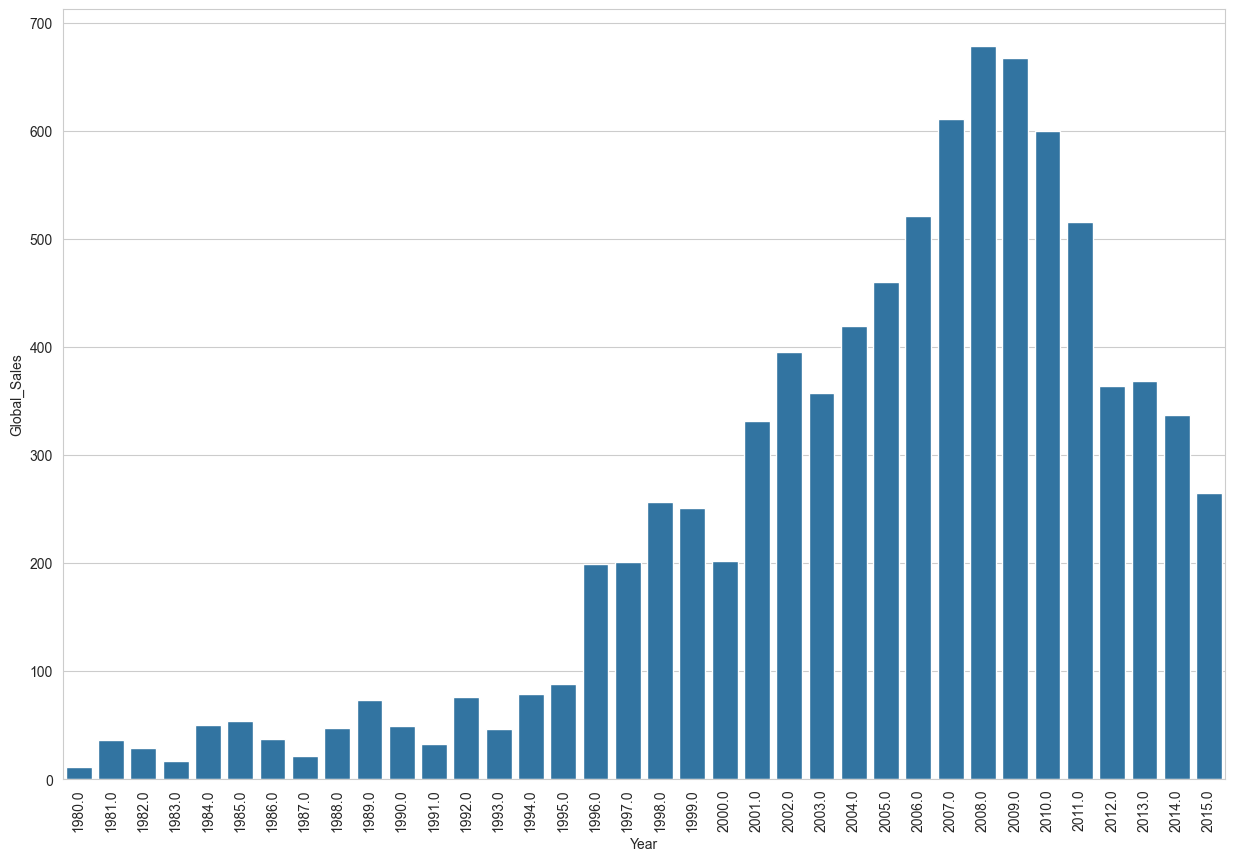

In [21]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

### 2008 .interesting 2006 was not in top 5 game release year but it is in top 5 highest sale year

# 5. Which genre game has been released the most in a single year?

In [22]:
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform('max') == year_sale_dx['Global_Sales']

year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)


In [23]:
genre = year_sale_max['Genre']

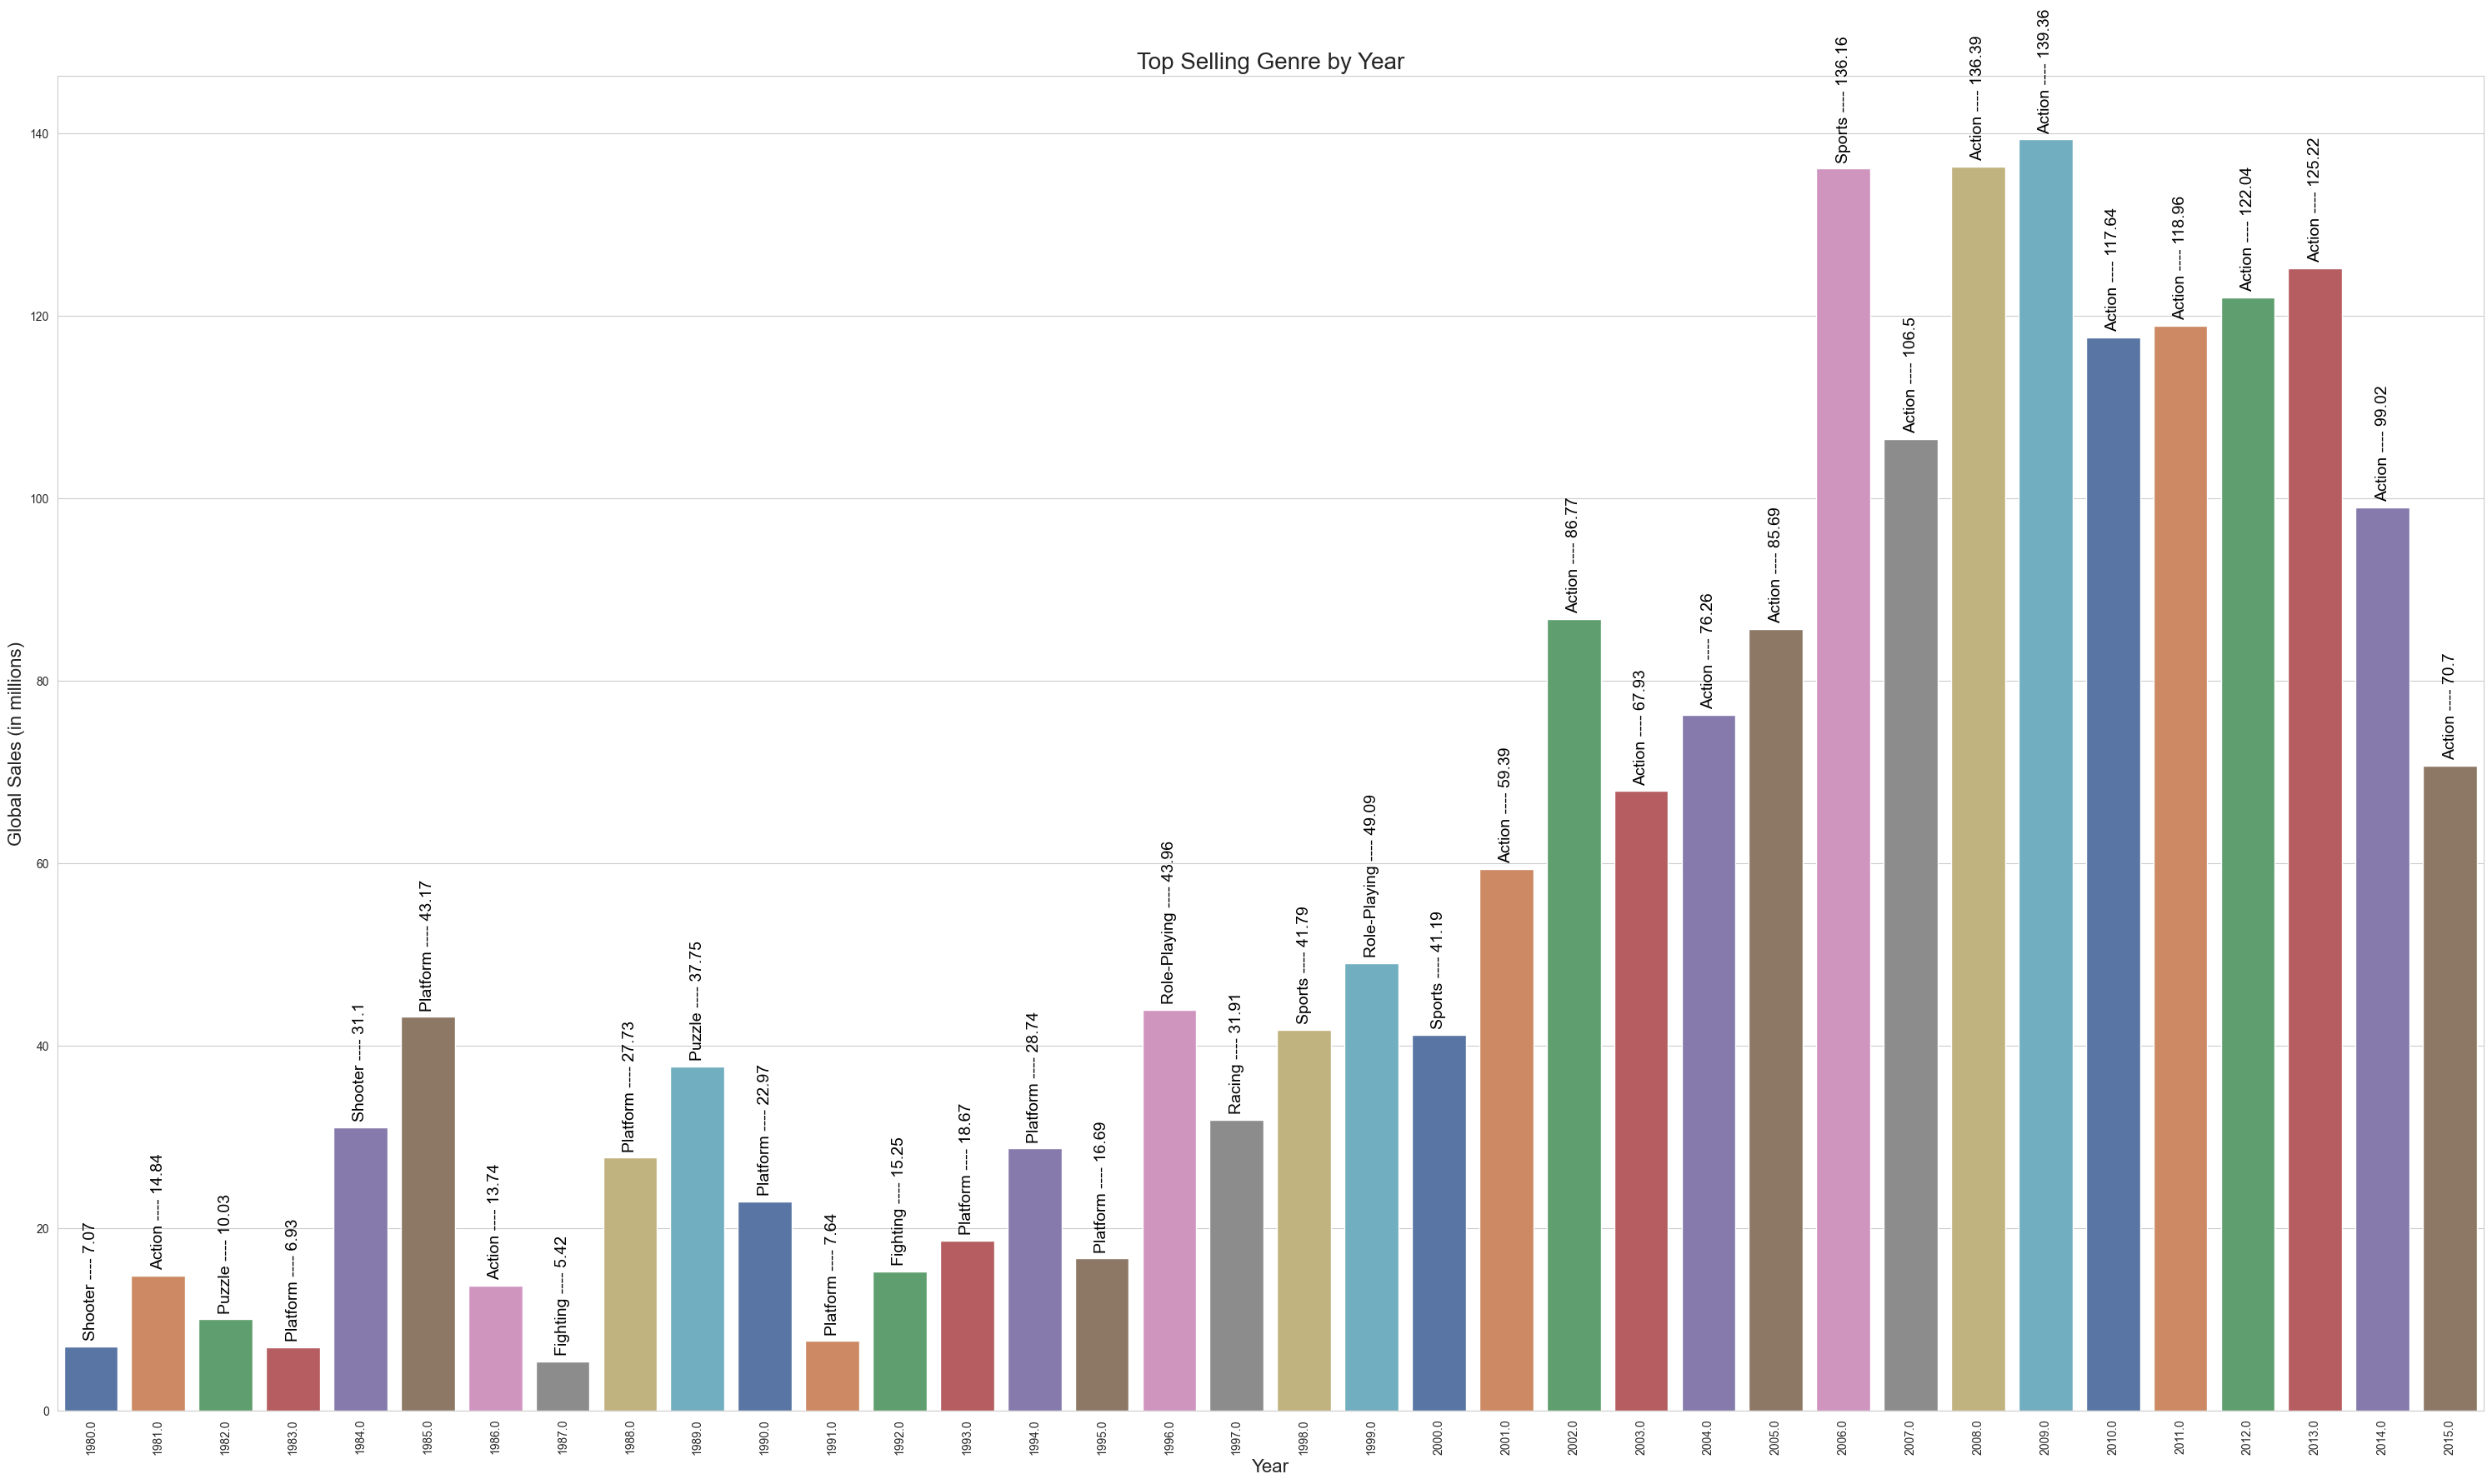

In [24]:
plt.figure(figsize=(30, 18))

# Barplot with colors
g = sns.barplot(
    x='Year',
    y='Global_Sales',
    data=year_sale_max,
    hue='Year',             # Required to apply palette safely
    palette='deep',         #Colorful palette
    legend=False,           # No duplicate legend
    dodge=False
)
#Annotate each bar
for index, row in year_sale_max.iterrows():
    g.text(
        index,
        row['Global_Sales'] + 1,
        f"{row['Genre']} ---- {round(row['Global_Sales'], 2)}",
        color='#000',
        size=14,
        rotation=90,
        ha="center"
    )

plt.title("Top Selling Genre by Year", fontsize=20)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Global Sales (in millions)", fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Answer is => 2009 Action ---> 139.36 million and 2008 Action ---> 136.39 miliion .

## 6. Which genre game have the highest sale price globally

In [25]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)

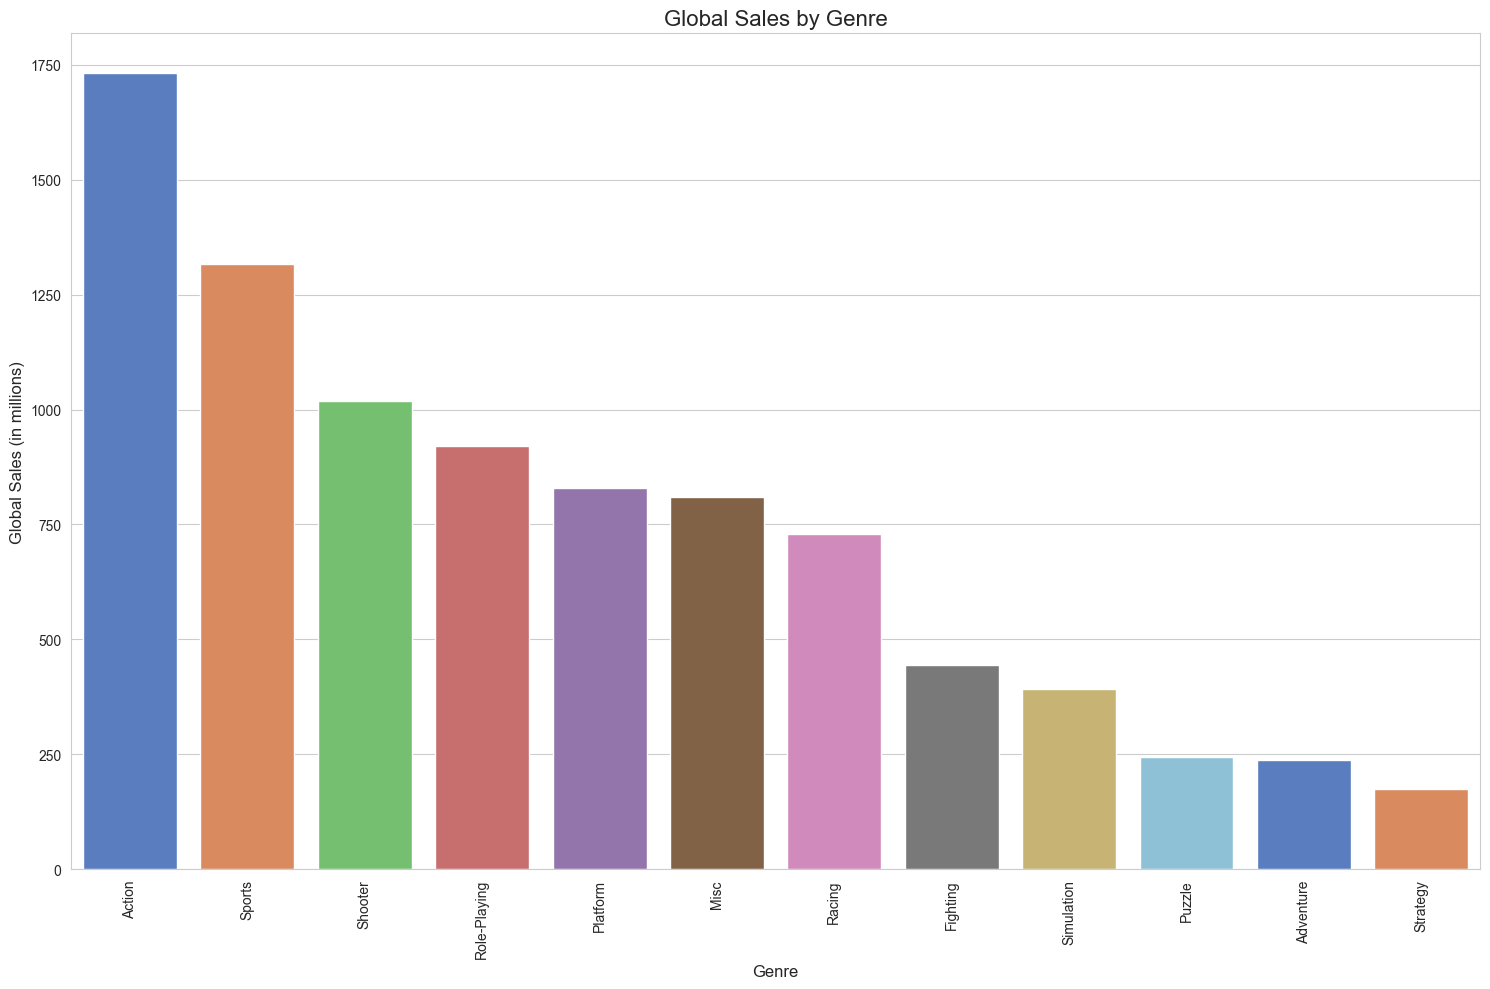

In [26]:
plt.figure(figsize=(15, 10))
sns.barplot(
    x="Genre", 
    y="Global_Sales", 
    data=data_genre, 
    hue="Genre",           # Use hue
    palette="muted",        #Assign palette
    legend=False,          # Hide legend since x and hue are same
    dodge=False            # Ensure bars are not separated
)
plt.xticks(rotation=90)
plt.title("Global Sales by Genre", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Global Sales (in millions)", fontsize=12)
plt.tight_layout()
plt.show()

## In top 5 "shooter" is also in the list and action and sports are the top

## 7. Which platfrom have the highest sale price globally

In [27]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

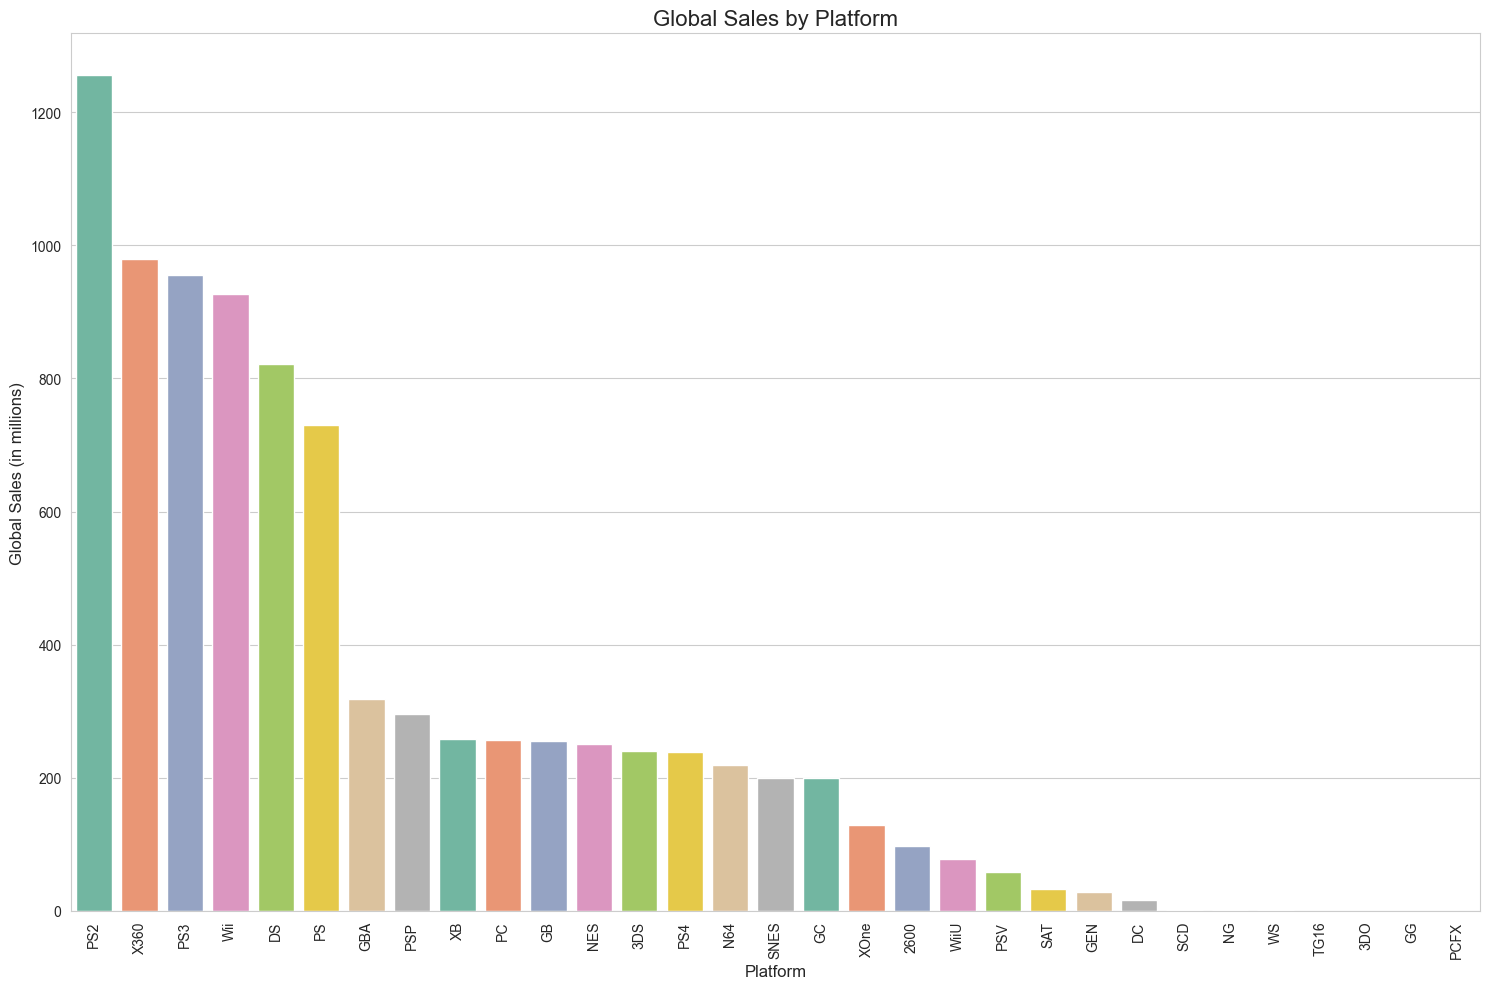

In [28]:
plt.figure(figsize=(15, 10))

sns.barplot(
    x="Platform", 
    y="Global_Sales", 
    data=data_platform, 
    hue="Platform",       #  Required for color
    palette="Set2",       # Color palette
    dodge=False,          #  Keep bars together
    legend=False          # No duplicate legend
)

plt.title("Global Sales by Platform", fontsize=16)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Global Sales (in millions)", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## The winner is PS2

## 8. Which individual game have the highest sale price globally?

In [29]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)

In [30]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

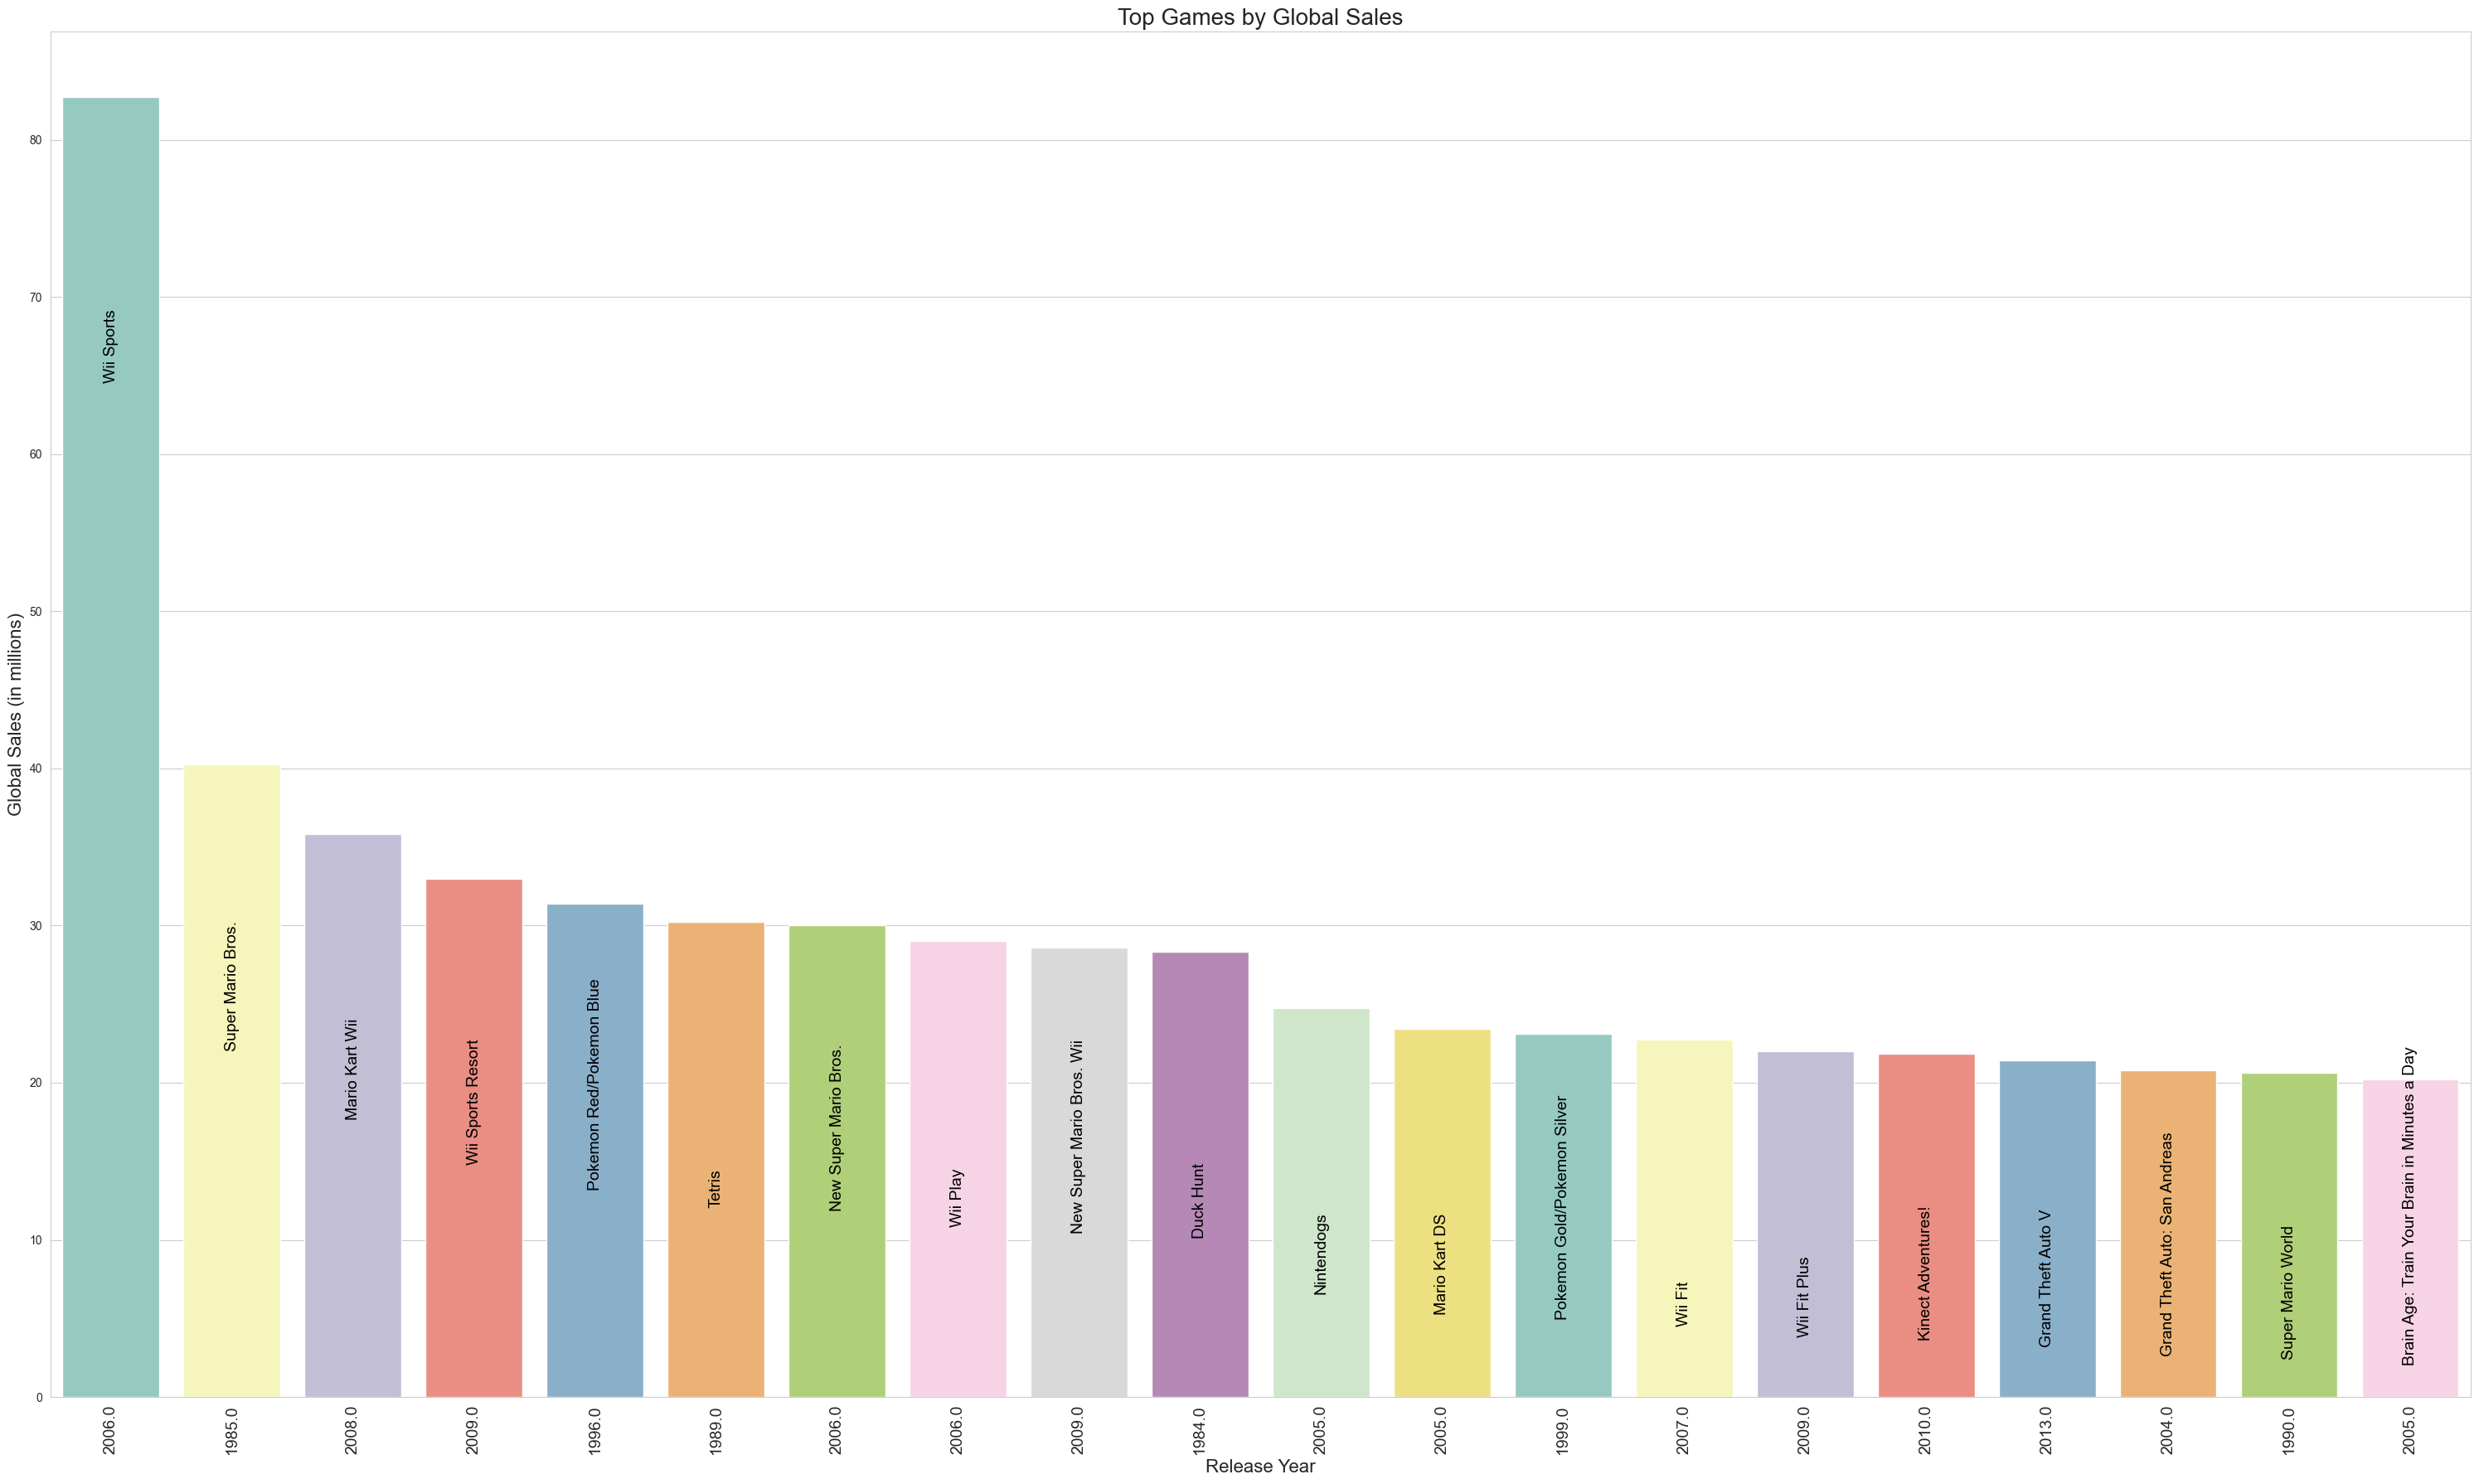

In [31]:
plt.figure(figsize=(30, 18))
g = sns.barplot(
    x='Name', 
    y='Global_Sales', 
    data=top_game_sale,
    hue='Name',         
    palette='Set3',    
    dodge=False,
    legend=False
)# Annotate each bar with game name
for index, value in enumerate(top_game_sale['Global_Sales']):
    g.text(
        index,
        value - 18,                         # Adjust for label position
        top_game_sale['Name'][index],     
        color='#000',
        size=14,
        rotation=90,
        ha="center"
    )
plt.xticks(
    ticks=range(len(top_game_sale)), 
    labels=top_game_sale['Year'], 
    fontsize=14, 
    rotation=90
)
plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Global Sales (in millions)', fontsize=16)
plt.title('Top Games by Global Sales', fontsize=20)
plt.tight_layout()
plt.show()


### Wii sports tops

## 9. Sales comparison by genre

In [32]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map

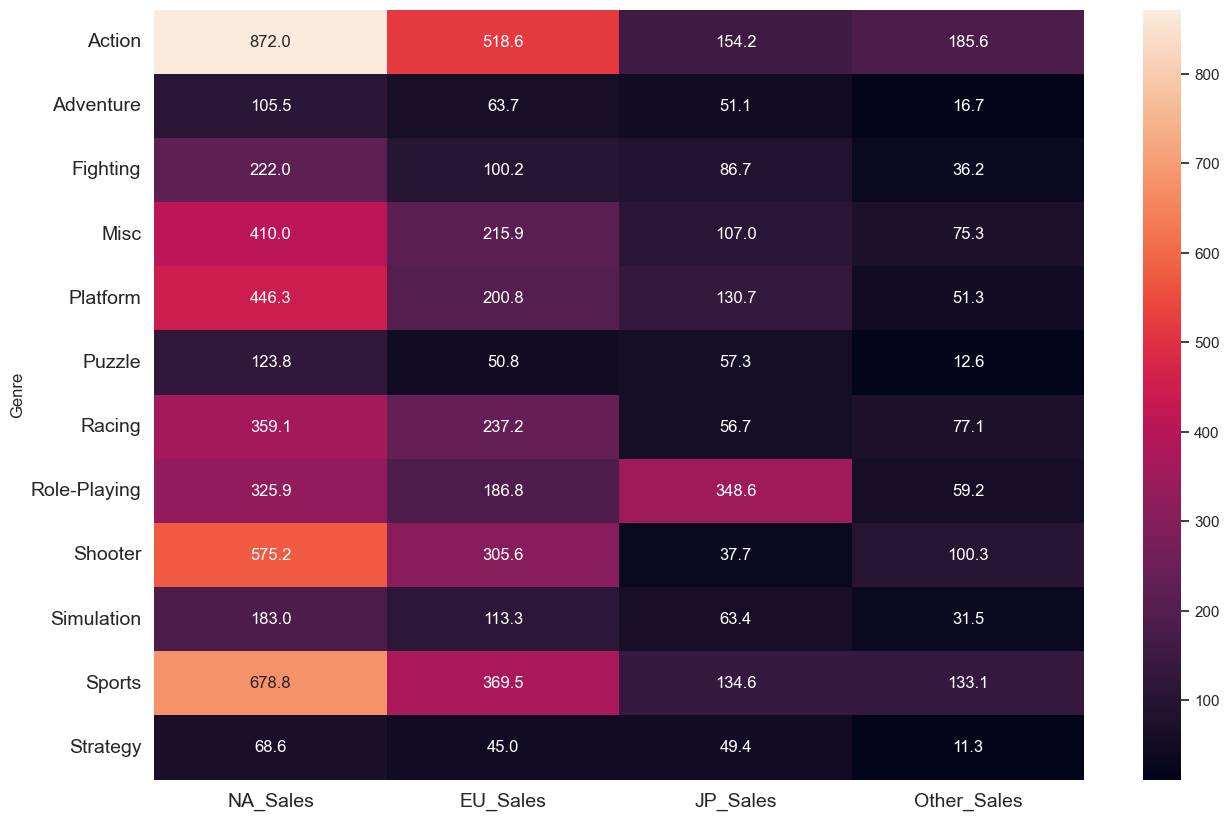

In [33]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [34]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,871.96
1,Adventure,NA_Sales,105.46
2,Fighting,NA_Sales,221.99
3,Misc,NA_Sales,410.02
4,Platform,NA_Sales,446.26


<Axes: xlabel='Genre', ylabel='Sale_Price'>

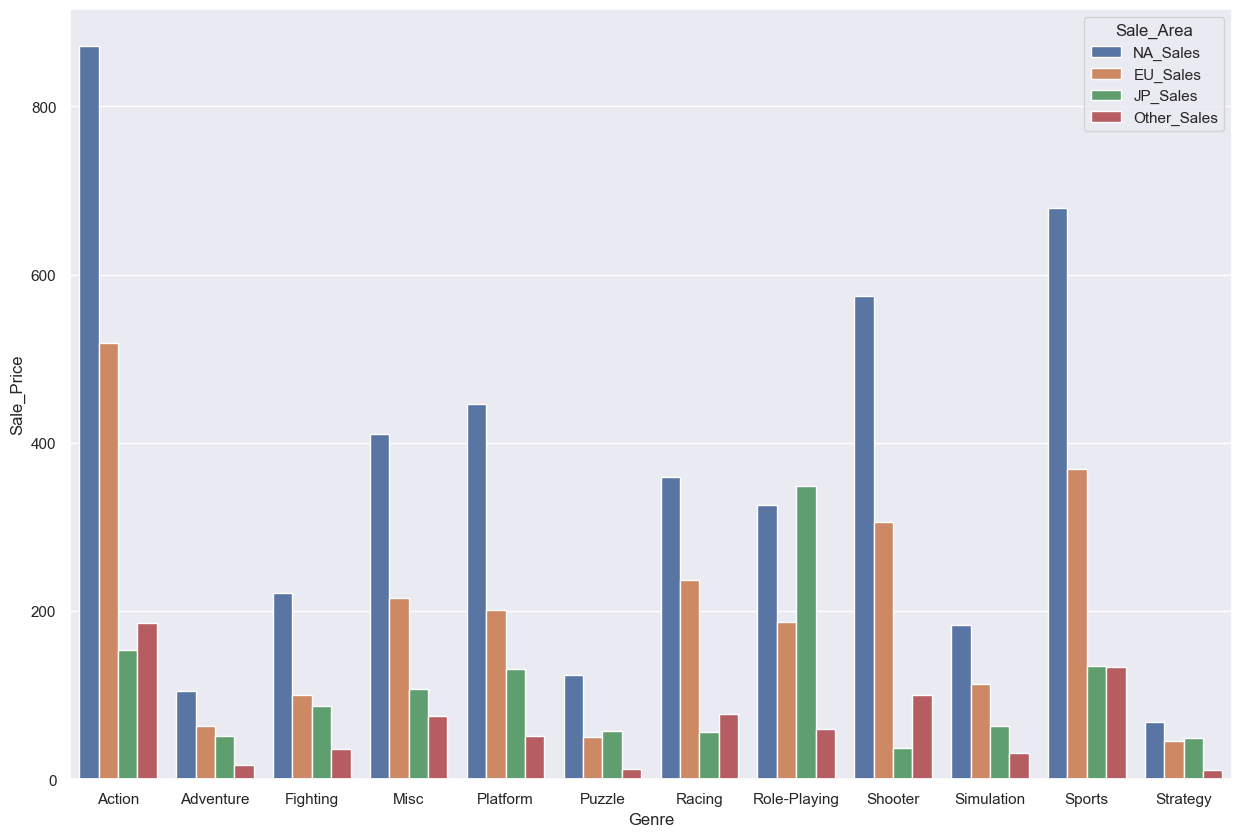

In [35]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

### As we can see 'Action' and 'Sports' are most selling genre and North America(NA_Sales) are highest.

## 10. Top 15 publishers

In [36]:
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(15)
top_publisher = pd.DataFrame(top_publisher).reset_index()
# top_publisher

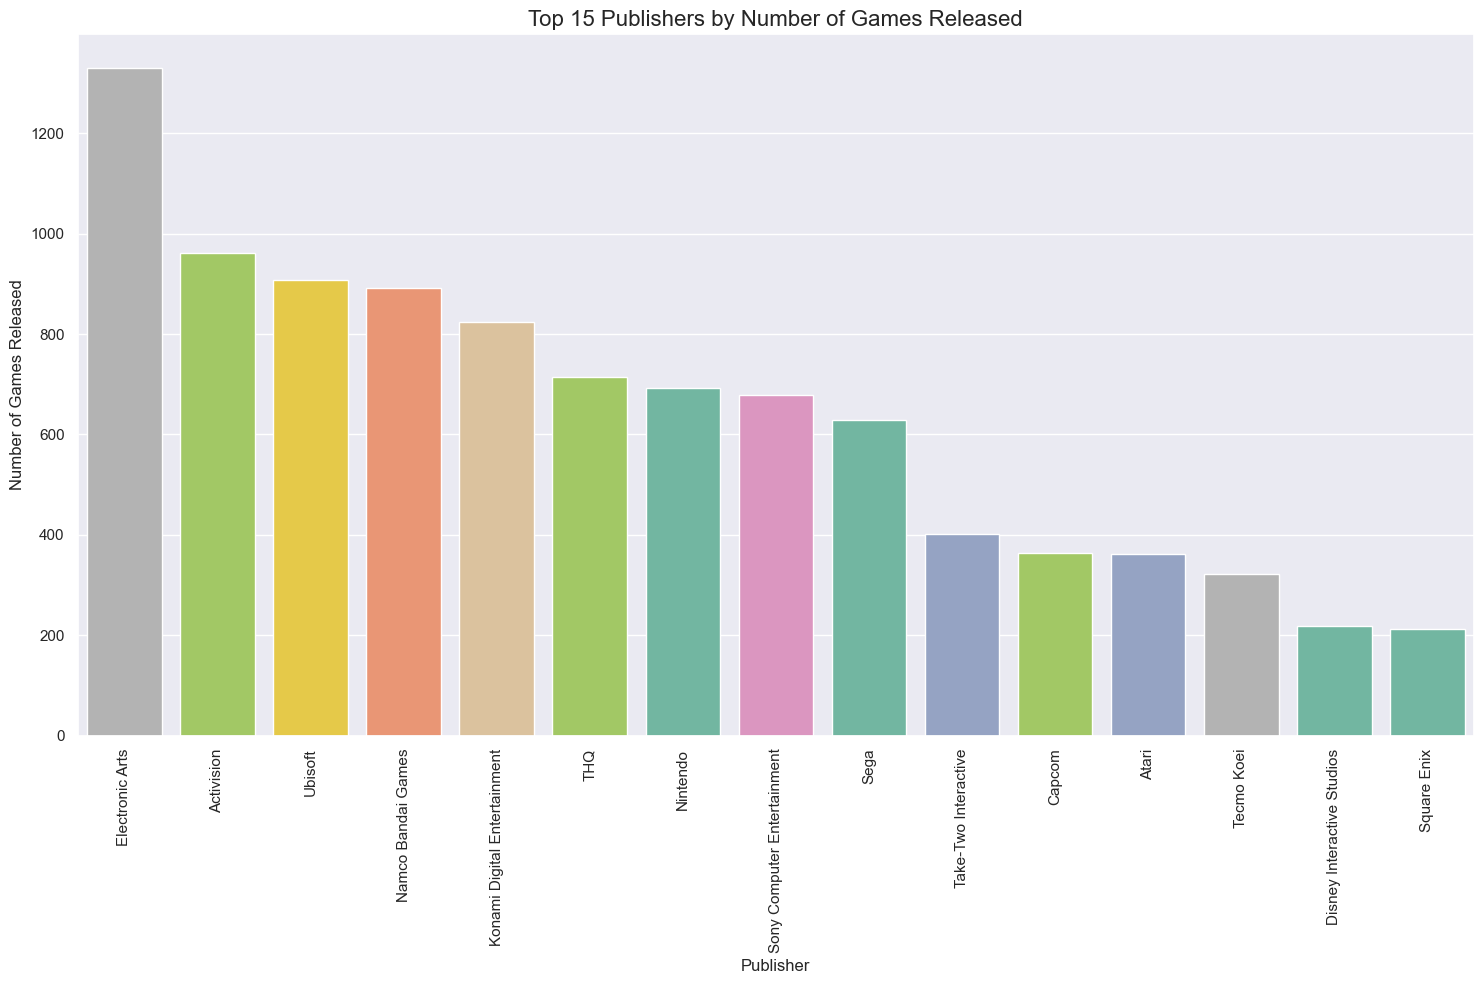

In [37]:
plt.figure(figsize=(15, 10))

sns.countplot(
    x="Publisher",
    data=data,
    order=data.groupby('Publisher')['Year']
               .count()
               .sort_values(ascending=False)
               .iloc[:15]
               .index,
    hue='Publisher',       
    palette='Set2',          
    dodge=False,
    legend=False              
)

plt.title("Top 15 Publishers by Number of Games Released", fontsize=16)
plt.xlabel("Publisher", fontsize=12)
plt.ylabel("Number of Games Released", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Electronic Arts publishes most games

## 11. Top global sales by publisher

In [38]:
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

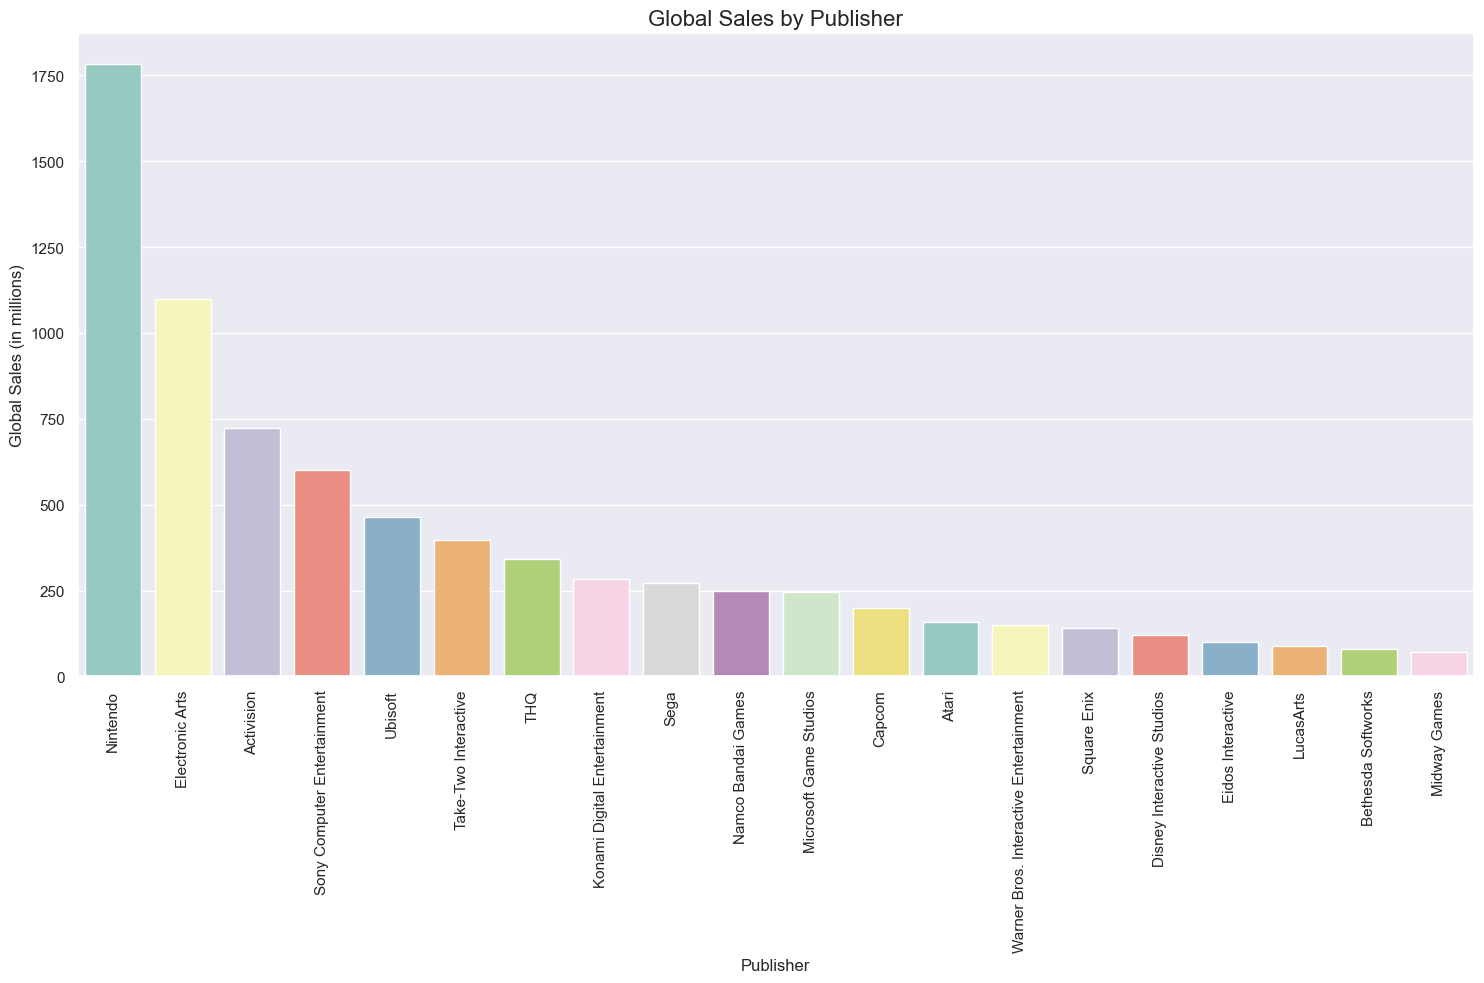

In [39]:
plt.figure(figsize=(15, 10))

sns.barplot(
    x='Publisher',
    y='Global_Sales',
    data=sale_pbl,
    hue='Publisher',        
    palette='Set3',          
    dodge=False,
    legend=False           
)

plt.title("Global Sales by Publisher", fontsize=16)
plt.xlabel("Publisher", fontsize=12)
plt.ylabel("Global Sales (in millions)", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 11. Publisher comparison

In [40]:
comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [41]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)

In [42]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,815.71
1,Electronic Arts,NA_Sales,591.43
2,Activision,NA_Sales,428.03
3,Sony Computer Entertainment,NA_Sales,262.79
4,Ubisoft,NA_Sales,249.31
...,...,...,...
75,Disney Interactive Studios,Other_Sales,13.18
76,Eidos Interactive,Other_Sales,8.02
77,LucasArts,Other_Sales,10.50
78,Bethesda Softworks,Other_Sales,9.87


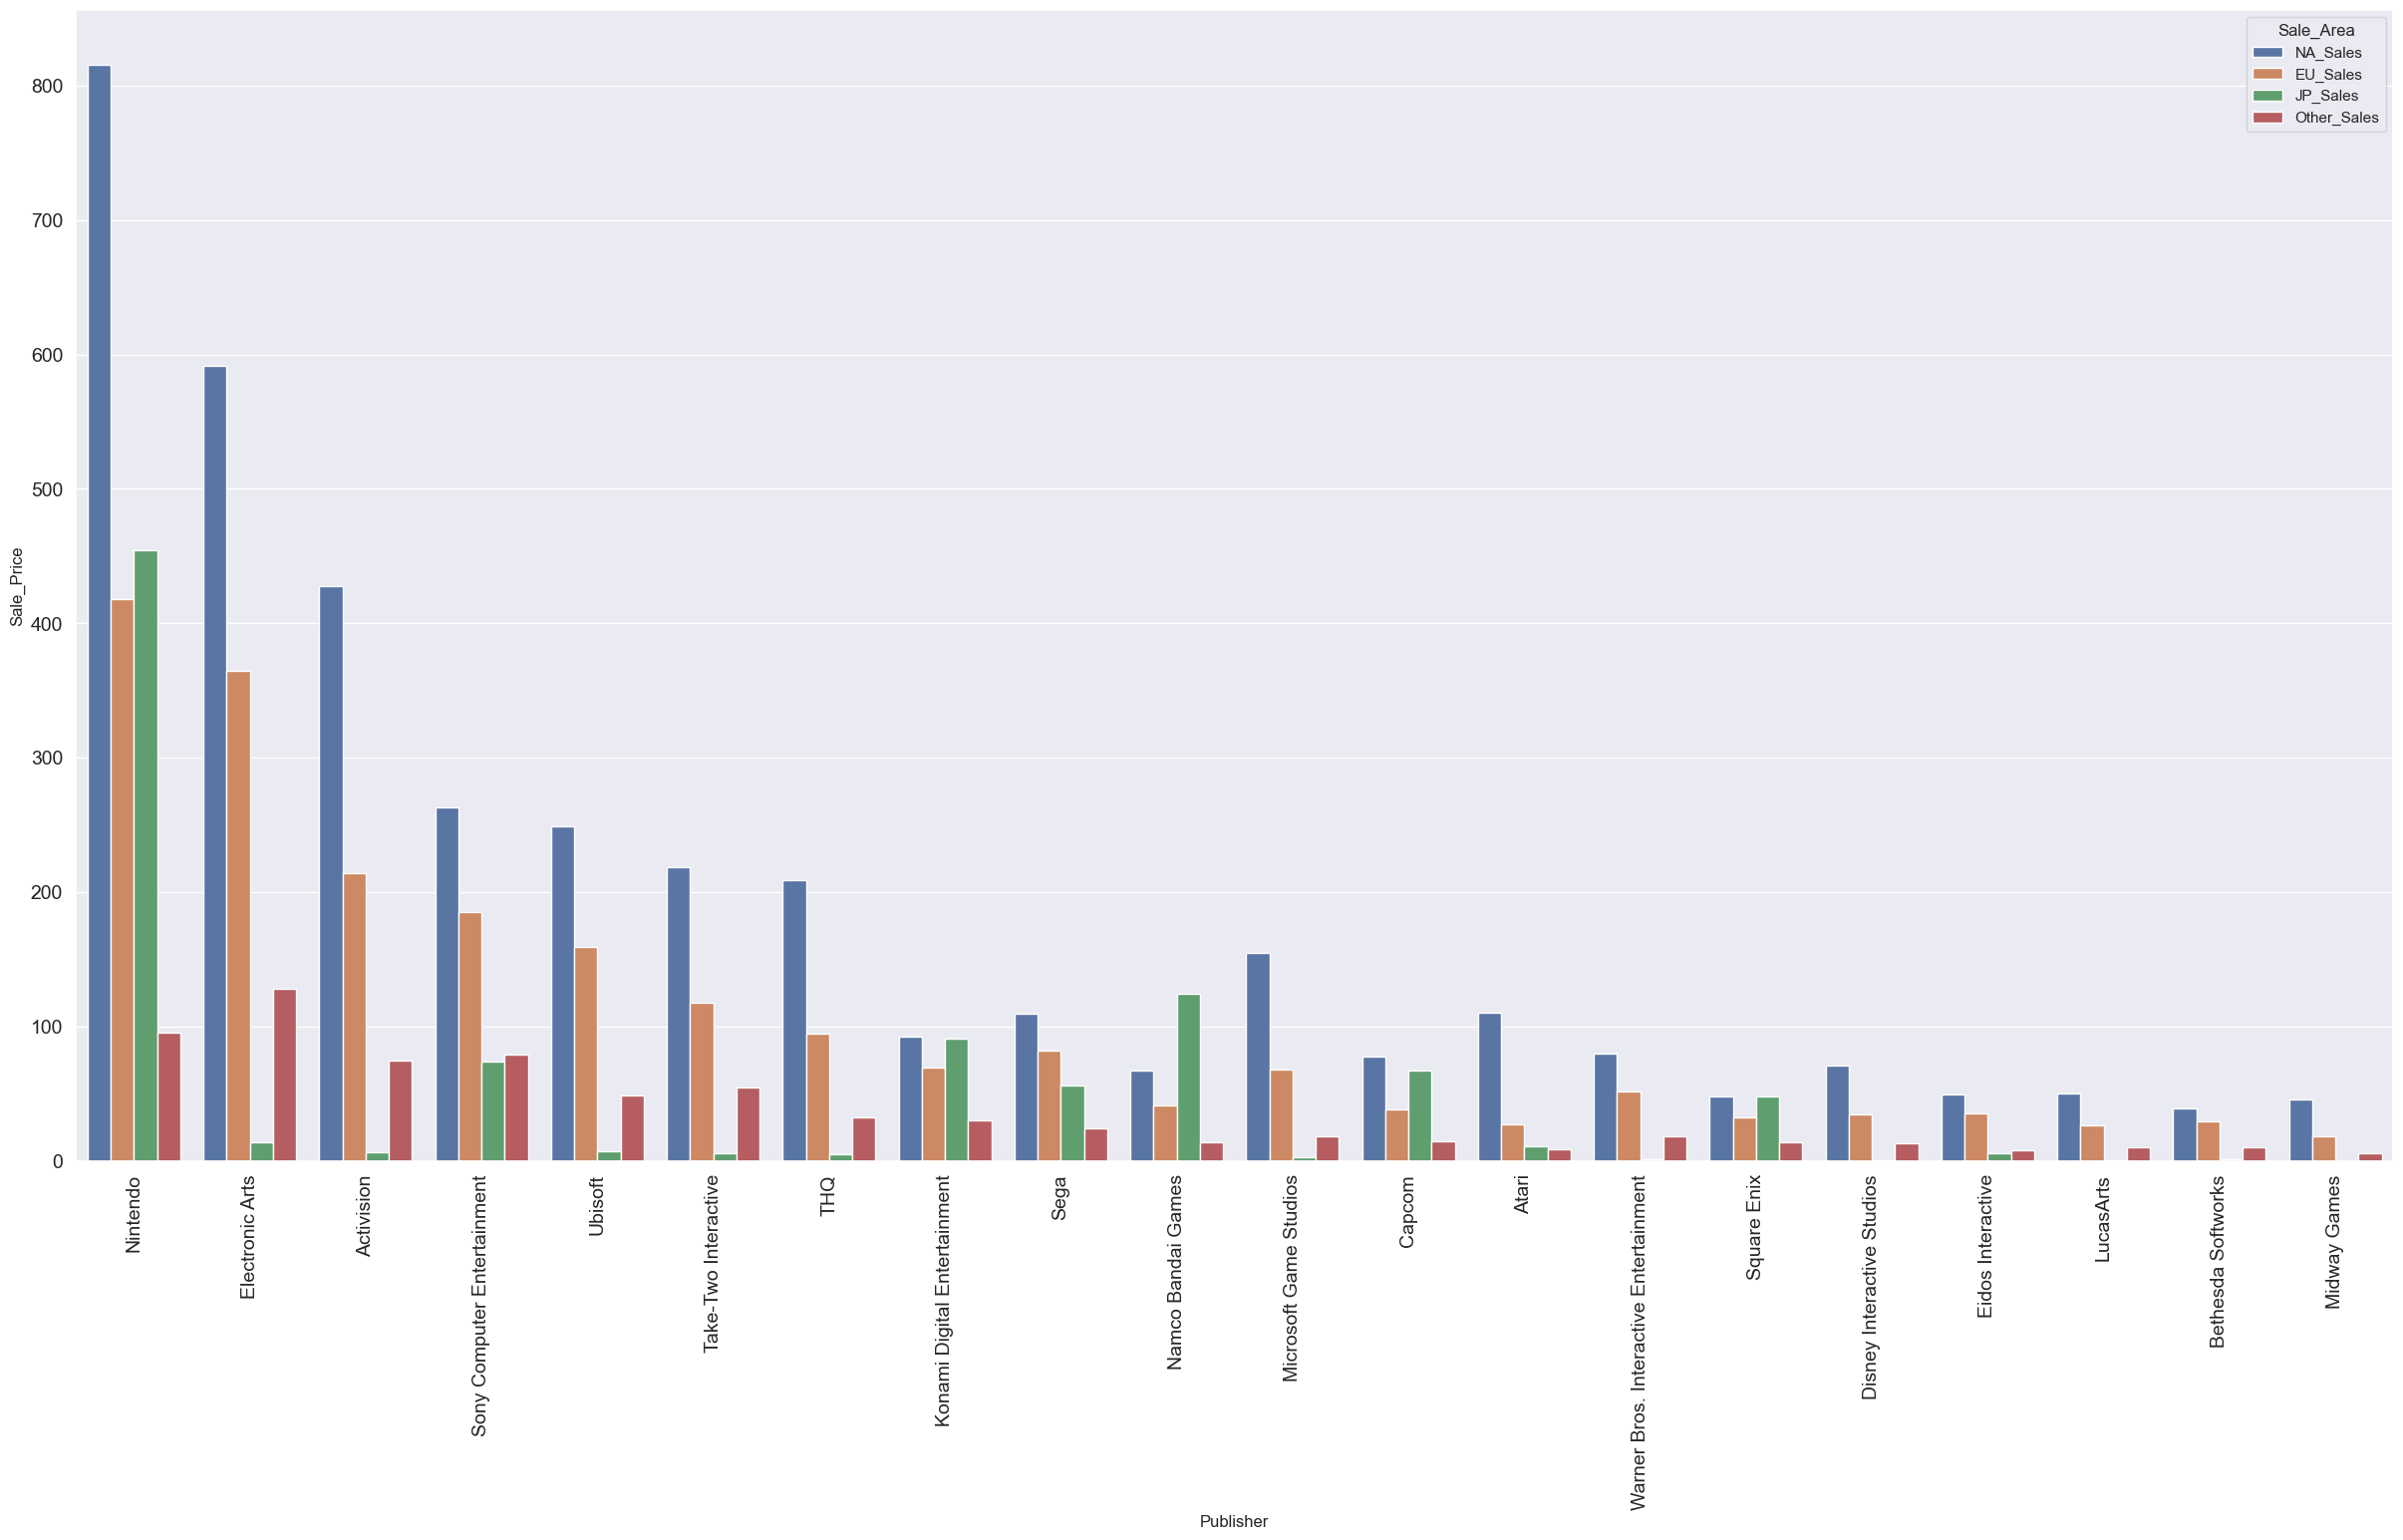

In [43]:

plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

## 12. Top publisher by count each year

In [44]:
top_publisher = data[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx = top_publisher_df.groupby('Year')['Count'].transform('max') == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count = top_publisher_count.drop_duplicates(subset=['Year'], keep='first').reset_index(drop=True)


In [45]:
publisher= top_publisher_count['Publisher']

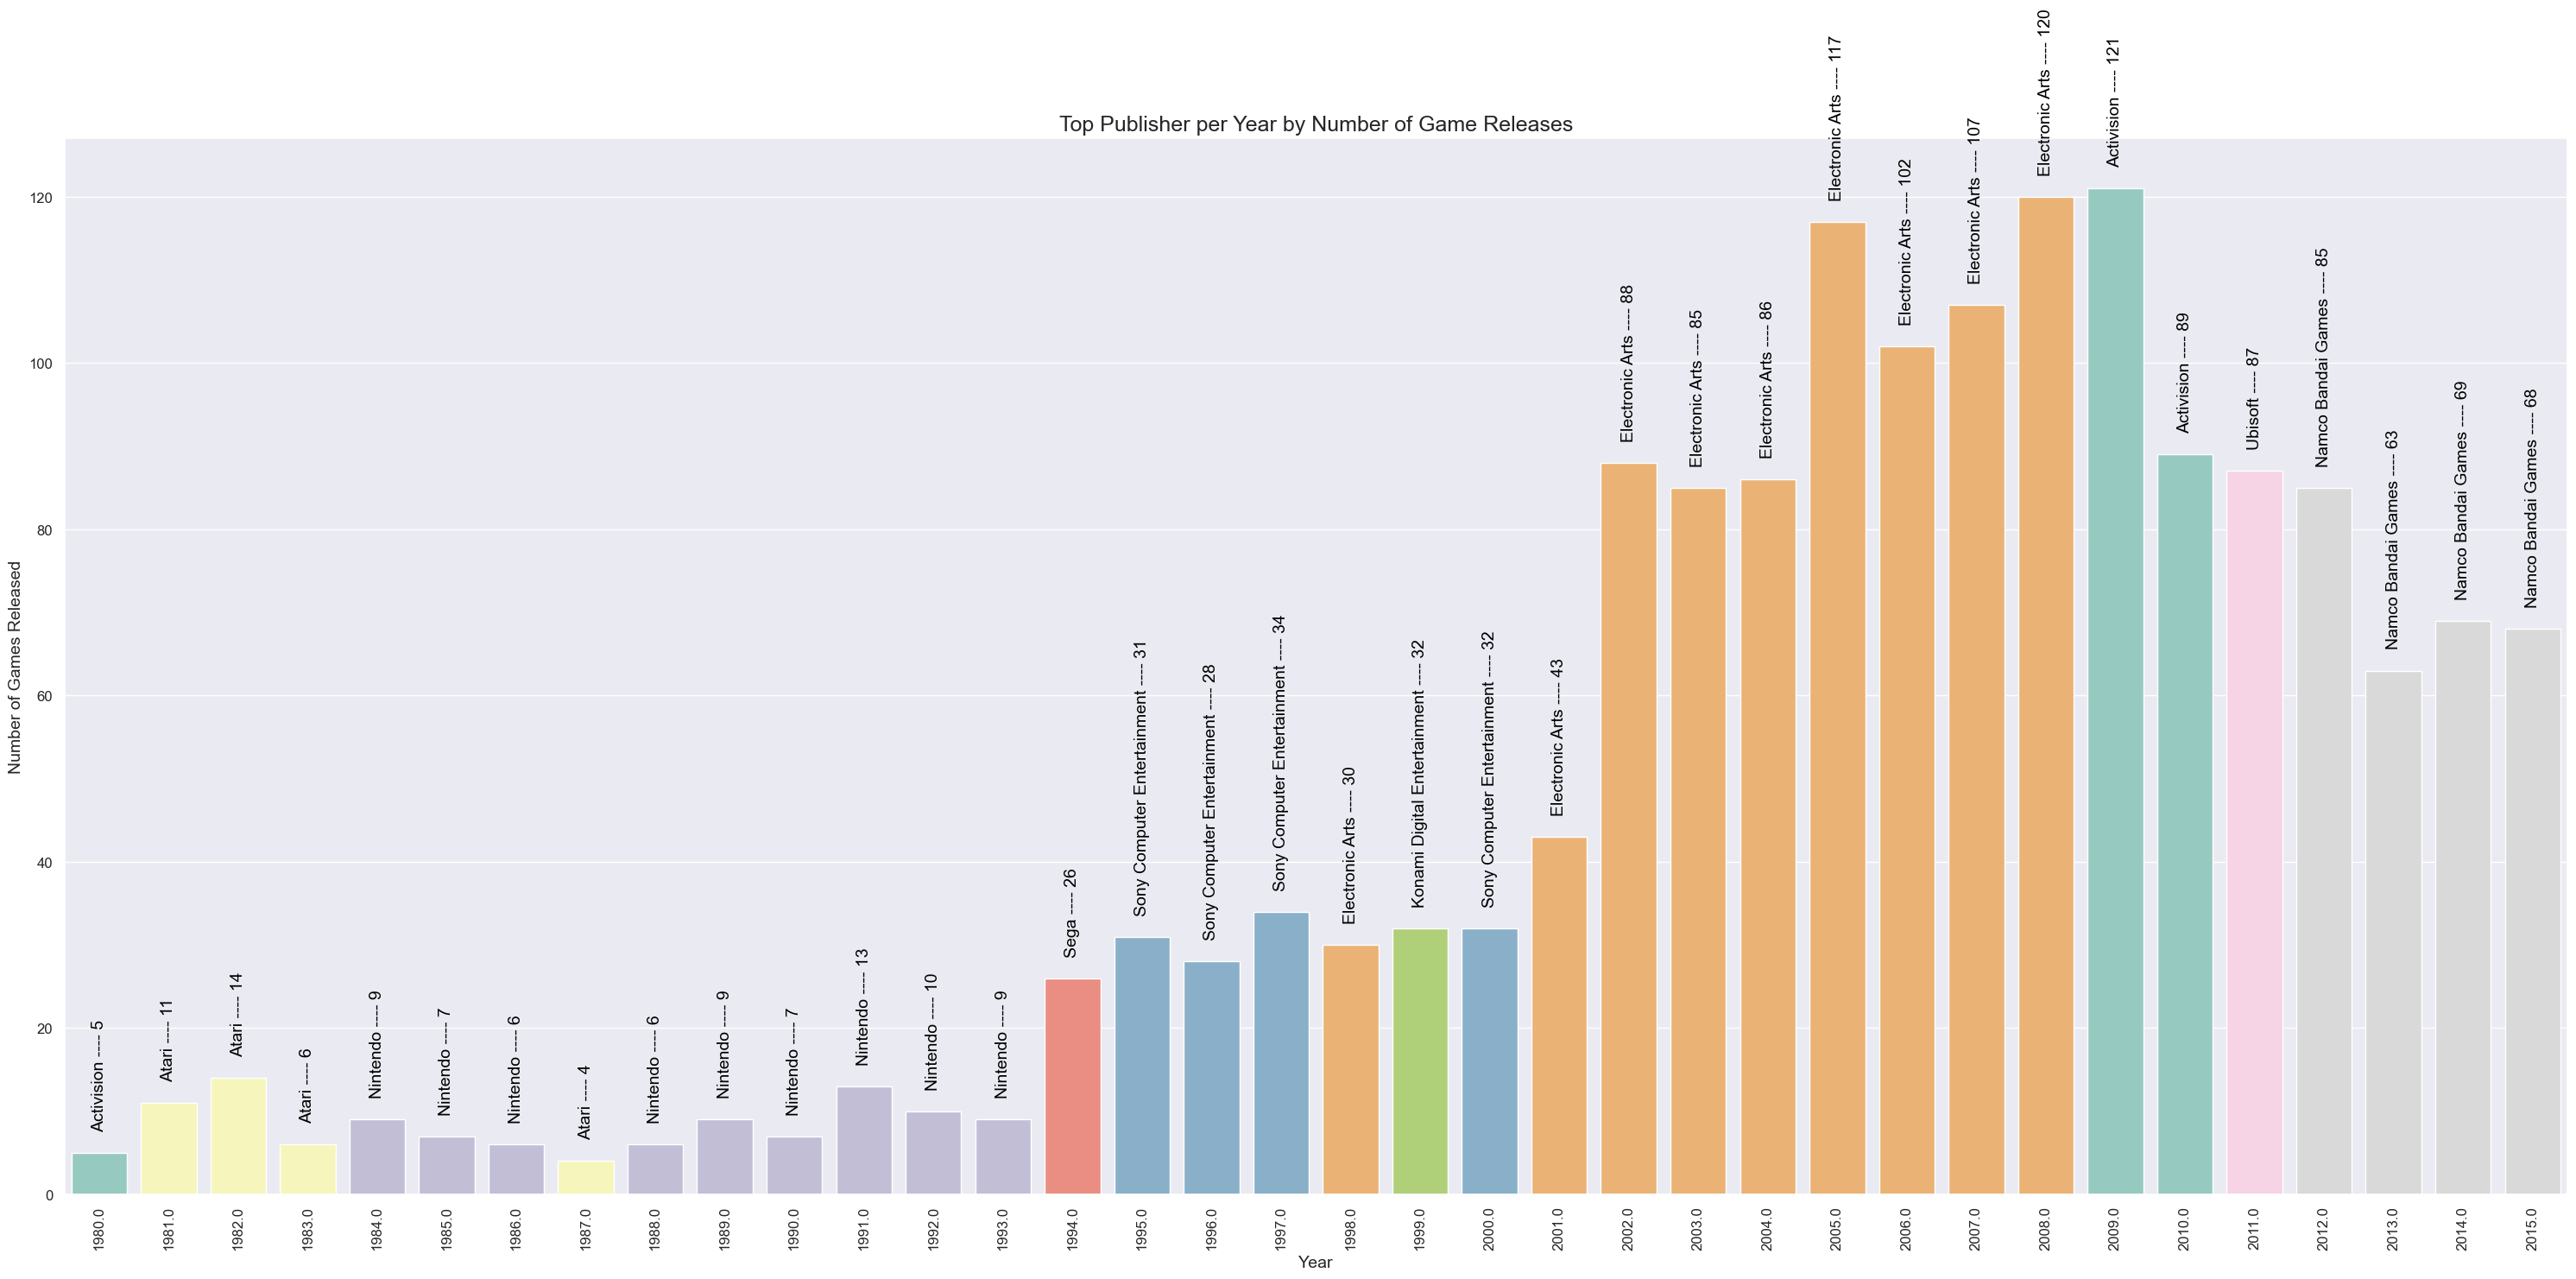

In [46]:
plt.figure(figsize=(30, 15))
g = sns.barplot(
    x='Year',
    y='Count',
    data=top_publisher_count,
    hue='Publisher',      
    palette='Set3',
    dodge=False,
    legend=False          
)
for index, (value, publisher) in enumerate(zip(top_publisher_count['Count'], top_publisher_count['Publisher'])):
    g.text(
        index,
        value + 3,
        f'{publisher} ---- {value}',
        color='black',
        size=14,
        rotation=90,
        ha='center'
    )

plt.title('Top Publisher per Year by Number of Game Releases', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Games Released', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



## 13. Total revenue by region

In [47]:
data.head

<bound method NDFrame.head of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales

In [48]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4370.02
1,EU_Sales,2407.37
2,JP_Sales,1277.27
3,Other_Sales,789.98


<Axes: xlabel='region', ylabel='sale'>

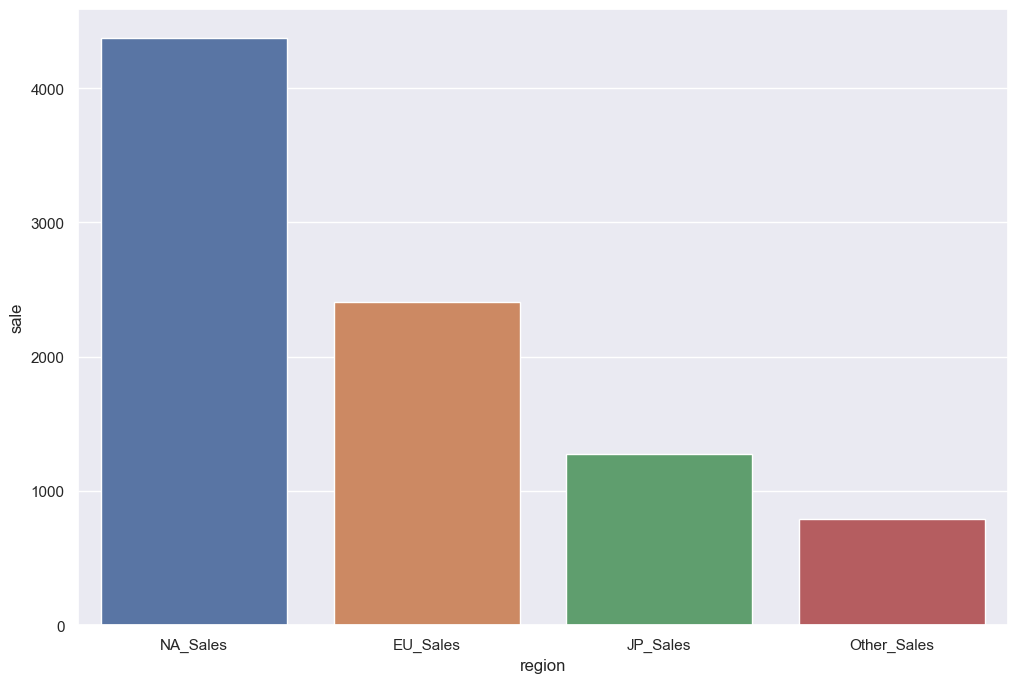

In [49]:
plt.figure(figsize=(12, 8))
sns.barplot(
    x='region',
    y='sale',
    data=top_sale_reg,
    hue='region',        # enable palette safely
    palette='deep',
    dodge=False,
    legend=False         # remove unnecessary legend
)

In [50]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

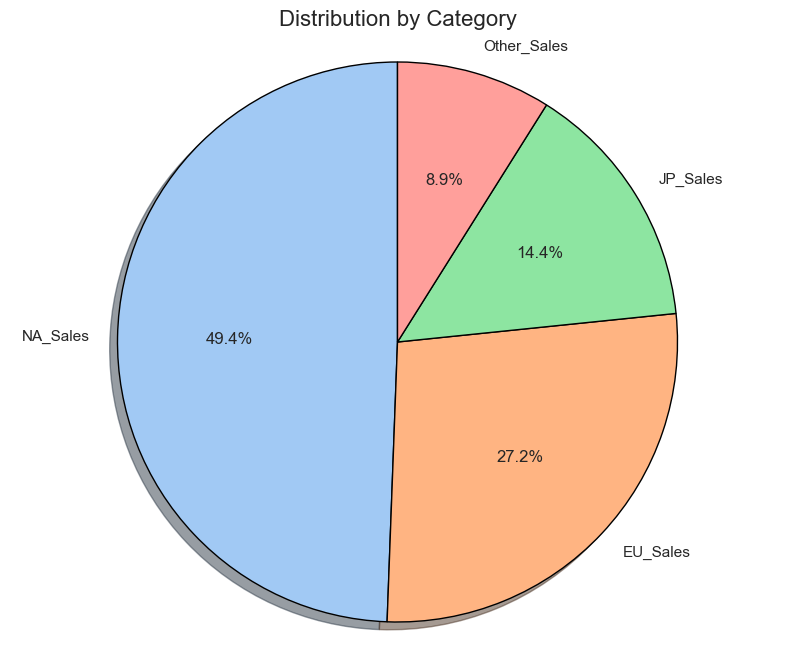

In [51]:
plt.figure(figsize=(10, 8))
colors = sns.color_palette('pastel')[0:len(labels)]  # use a soft color palette

plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',   # percentage display
    shadow=True,
    startangle=90,
    colors=colors,       # set custom colors
    wedgeprops={'edgecolor': 'black'}  # optional: adds border to slices
)

plt.title('Distribution by Category', fontsize=16)
plt.axis('equal')  # makes the pie a perfect circle
plt.show()

### North America almost Cover 50% of sales.